#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [2]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/home/skiria/anaconda3/bin:/home/skiria/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin


In [4]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [6]:
import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
download=wget.download(url)
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

KeyboardInterrupt: 

In [5]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("/home/skiria/Downloads/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [6]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [7]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

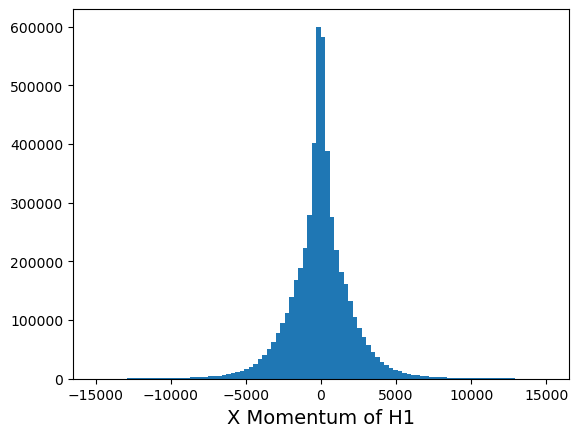

In [8]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

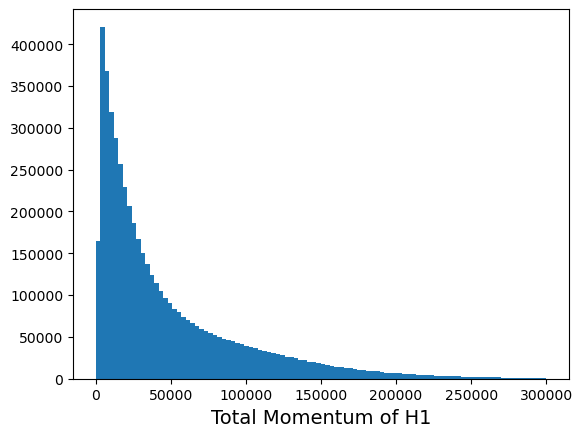

In [9]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()
# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot=np.sqrt(H1_PX*H1_PX+H1_PY*H1_PY+H1_PZ*H1_PZ)

# then here you can plot something (remember to adjust the range)
plt.figure();
plt.hist (H1_Ptot, bins=100, range=(0,300000));
plt.xlabel('Total Momentum of H1', fontsize=14);


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

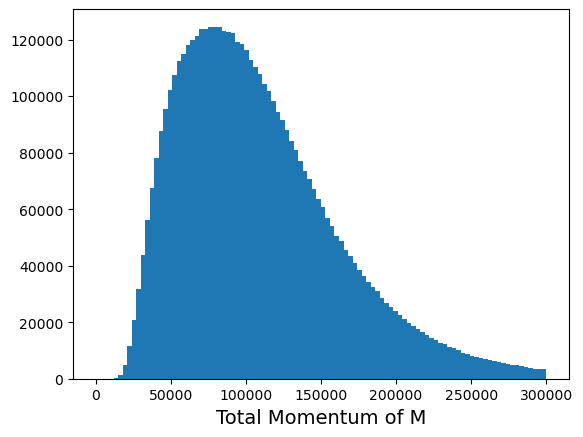

In [10]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()
Events=f['DecayTree']
H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()
Events=f['DecayTree']
H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()
# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot=np.sqrt(H1_PX*H1_PX+H1_PY*H1_PY+H1_PZ*H1_PZ)
H2_Ptot=np.sqrt(H2_PX*H2_PX+H2_PY*H2_PY+H2_PZ*H2_PZ)
H3_Ptot=np.sqrt(H3_PX*H3_PX+H3_PY*H3_PY+H3_PZ*H3_PZ)
B_Ptot=np.sqrt(H1_Ptot*H1_Ptot+H2_Ptot*H2_Ptot+H3_Ptot*H3_Ptot)
# then here you can plot something (remember to adjust the range)
plt.figure();
plt.hist (B_Ptot, bins=100, range=(0,300000));
plt.xlabel('Total Momentum of M', fontsize=14);



So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [11]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print (f"{branch} :  {value}")

Event number #45
-------------------
B_FlightDistance :  257.00205776946603
B_VertexChi2 :  1.865567179221614
H1_PX :  420.3413896413646
H1_PY :  -110.66276079201207
H1_PZ :  5883.766388082404
H1_ProbK :  0.012183159589767456
H1_ProbPi :  0.8191394209861755
H1_Charge :  -1
H1_IPChi2 :  27121.53690741779
H1_isMuon :  1
H2_PX :  -985.6367588987478
H2_PY :  630.9893539299605
H2_PZ :  35342.13861801284
H2_ProbK :  0.6670113801956177
H2_ProbPi :  0.04563945531845093
H2_Charge :  1
H2_IPChi2 :  13712.438218214942
H2_isMuon :  0
H3_PX :  -6242.300384410311
H3_PY :  -862.2130979651508
H3_PZ :  277275.49225626234
H3_ProbK :  0.07501816749572754
H3_ProbPi :  0.428352952003479
H3_Charge :  1
H3_IPChi2 :  1026.12298434195
H3_isMuon :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

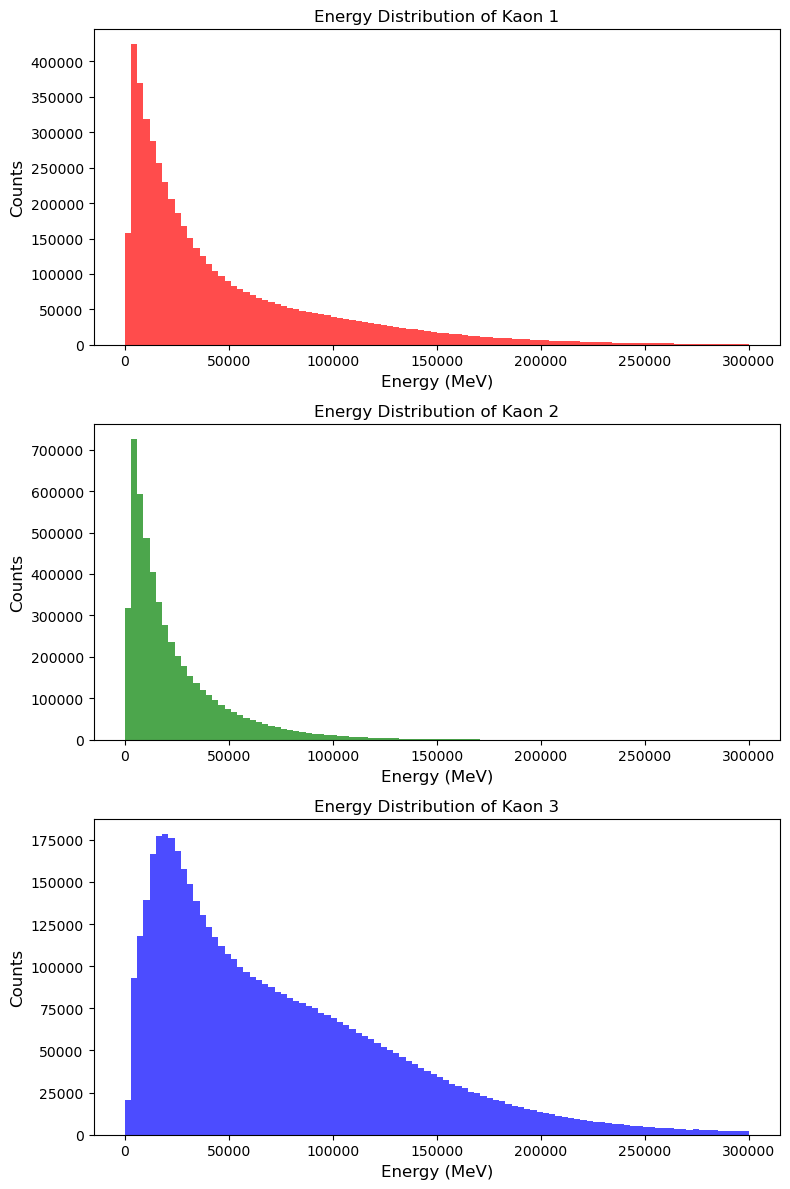

In [12]:
# mass of the Kaon in MeV/c^2, taken from https://pdg.lbl.gov/2020/reviews/rpp2020-rev-charged-kaon-mass.pdf
kaon_mass = 493.677

#for H2 and H3 I'm doing the same Ptot as for H1
H2_Ptot=np.sqrt(H2_PX**2+H2_PY**2+H2_PZ**2)
H3_Ptot=np.sqrt(H3_PX**2+H3_PY**2+H3_PZ**2)

#next, in order to calculate the energy of the kaon, I used the formula provided above for energy
H1_E = np.sqrt(H1_Ptot**2 + kaon_mass**2)
H2_E = np.sqrt(H2_Ptot**2 + kaon_mass**2)
H3_E = np.sqrt(H3_Ptot**2 + kaon_mass**2)
# Create subplots for each histogram
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Define x-axis range for better zoom (adjust as needed)
x_min, x_max = 0, 300000  # Adjust based on observed energy range

# Plot energy of Kaon 1
axes[0].hist(H1_E, bins=100, color='r', alpha=0.7, range=(x_min, x_max))
axes[0].set_xlabel('Energy (MeV)', fontsize=12)
axes[0].set_ylabel('Counts', fontsize=12)
axes[0].set_title('Energy Distribution of Kaon 1')

# Plot energy of Kaon 2
axes[1].hist(H2_E, bins=100, color='g', alpha=0.7, range=(x_min, x_max))
axes[1].set_xlabel('Energy (MeV)', fontsize=12)
axes[1].set_ylabel('Counts', fontsize=12)
axes[1].set_title('Energy Distribution of Kaon 2')

# Plot energy of Kaon 3
axes[2].hist(H3_E, bins=100, color='b', alpha=0.7, range=(x_min, x_max))
axes[2].set_xlabel('Energy (MeV)', fontsize=12)
axes[2].set_ylabel('Counts', fontsize=12)
axes[2].set_title('Energy Distribution of Kaon 3')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()




We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

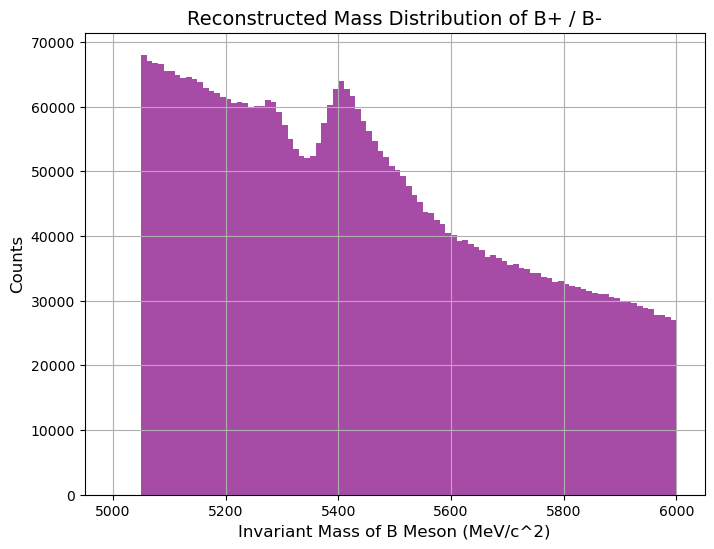

In [13]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters

#Now plot a histogram of the range of masses of the B meson.

#Does this match what we would expect from theory?

#Hint - look it up
# Compute total energy of the B meson
B_E = H1_E + H2_E + H3_E

# Compute total momentum components of the B meson
B_PX = H1_PX + H2_PX + H3_PX
B_PY = H1_PY + H2_PY + H3_PY
B_PZ = H1_PZ + H2_PZ + H3_PZ

# Compute invariant mass using M^2 = E^2 - (P_x^2 + P_y^2 + P_z^2)
B_mass = np.sqrt(B_E**2 - (B_PX**2 + B_PY**2 + B_PZ**2))

# Plot the mass distribution of the B meson
plt.figure(figsize=(8, 6))
plt.hist(B_mass, bins=100, range=(5000, 6000), color='purple', alpha=0.7)
plt.xlabel('Invariant Mass of B Meson (MeV/c^2)', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Reconstructed Mass Distribution of B+ / B-', fontsize=14)
plt.grid(True)
plt.show()


We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

In [16]:
#Make plots of H1/H2/H3 _ProbK on one plot
#Make plots of H1/H2/H3 _ProbPi on one plot
#For all our particles, make a plot of the B_VertexChi2
# Plot any other variables from the list above you think would be handy to use in a selection...

H1_ProbK Sample: [0.03861552 0.07355624 0.03009453 0.21141368 0.00569677 0.02221701
 0.11494783 0.06579947 0.003472   0.11485302]
H2_ProbK Sample: [3.07541102e-01 4.84067202e-02 7.98135996e-04 3.03314626e-02
 1.29935741e-02 6.60252869e-02 8.13132405e-01 1.04368180e-01
 4.03464139e-02 3.96334082e-01]
H3_ProbK Sample: [0.19300395 0.0803965  0.7507509  0.0056982  0.00297898 0.91930348
 0.35625154 0.04407609 0.26589352 0.00728458]


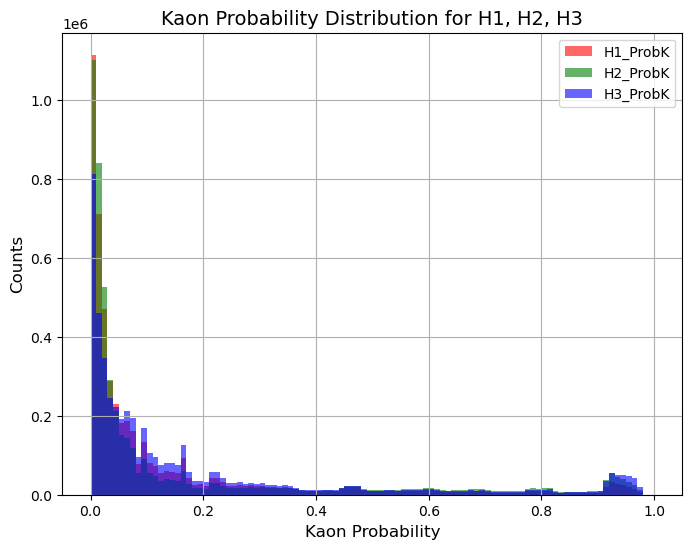

In [14]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# Open the ROOT file (Make sure your file path is correct)
file_path = "/home/skiria/Downloads/B2HHH_MagnetDown.root"
f = uproot.open(file_path)

# Access the Decay Tree
Events = f['DecayTree']

# Extract Kaon probabilities for the three particles
H1_ProbK = np.array(Events['H1_ProbK'].array(), dtype=float)
H2_ProbK = np.array(Events['H2_ProbK'].array(), dtype=float)
H3_ProbK = np.array(Events['H3_ProbK'].array(), dtype=float)

# Print first 10 values to check if they are in the expected range [0,1]
print("H1_ProbK Sample:", H1_ProbK[:10])
print("H2_ProbK Sample:", H2_ProbK[:10])
print("H3_ProbK Sample:", H3_ProbK[:10])

# Create a histogram with fixed x-axis range (0 to 1)
plt.figure(figsize=(8, 6))
plt.hist(H1_ProbK, bins=100, range=(0, 1), alpha=0.6, color='r', label='H1_ProbK')
plt.hist(H2_ProbK, bins=100, range=(0, 1), alpha=0.6, color='g', label='H2_ProbK')
plt.hist(H3_ProbK, bins=100, range=(0, 1), alpha=0.6, color='b', label='H3_ProbK')

# Labels, title, and legend
plt.xlabel('Kaon Probability', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Kaon Probability Distribution for H1, H2, H3', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


H1_ProbPi Sample: [0.88875508 0.03906399 0.63669282 0.35096881 0.93310165 0.89818716
 0.63693005 0.92067355 0.12971413 0.02880663]
H2_ProbPi Sample: [0.09576038 0.13743672 0.98619062 0.96376681 0.88653374 0.90442741
 0.05247104 0.6315074  0.9091242  0.51307929]
H3_ProbPi Sample: [0.13884515 0.75860345 0.39960164 0.96470511 0.9189828  0.12363777
 0.51858491 0.26877797 0.02278763 0.27947435]


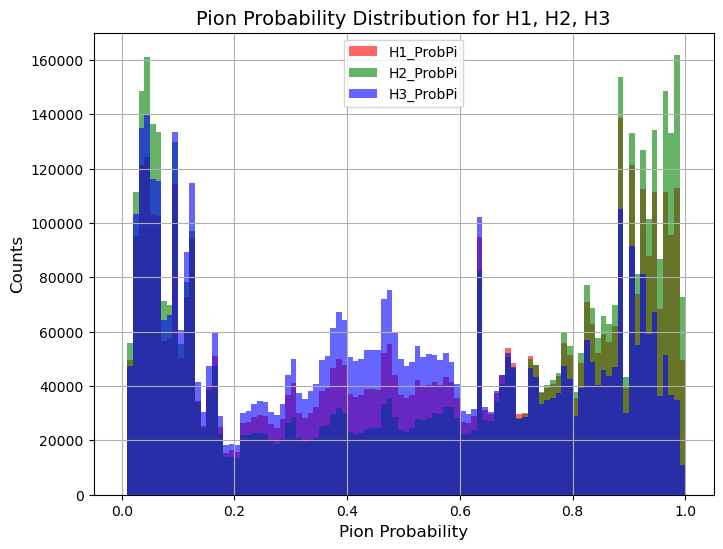

In [15]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# Open the ROOT file (Make sure your file path is correct)
file_path = "/home/skiria/Downloads/B2HHH_MagnetDown.root"
f = uproot.open(file_path)

# Access the Decay Tree
Events = f['DecayTree']

# Extract Pion probabilities for the three particles
H1_ProbPi = np.array(Events['H1_ProbPi'].array(), dtype=float)
H2_ProbPi = np.array(Events['H2_ProbPi'].array(), dtype=float)
H3_ProbPi = np.array(Events['H3_ProbPi'].array(), dtype=float)

# Print first 10 values to check if they are in the expected range [0,1]
print("H1_ProbPi Sample:", H1_ProbPi[:10])
print("H2_ProbPi Sample:", H2_ProbPi[:10])
print("H3_ProbPi Sample:", H3_ProbPi[:10])

# Create a histogram with fixed x-axis range (0 to 1)
plt.figure(figsize=(8, 6))
plt.hist(H1_ProbPi, bins=100, range=(0, 1), alpha=0.6, color='r', label='H1_ProbPi')
plt.hist(H2_ProbPi, bins=100, range=(0, 1), alpha=0.6, color='g', label='H2_ProbPi')
plt.hist(H3_ProbPi, bins=100, range=(0, 1), alpha=0.6, color='b', label='H3_ProbPi')

# Labels, title, and legend
plt.xlabel('Pion Probability', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Pion Probability Distribution for H1, H2, H3', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


B_VertexChi2 Sample: [ 1.49728005  1.38333774  5.1871014   7.12909861 10.98870121  2.58975926
  2.41598845  3.92717187  7.49242565  5.05622555]


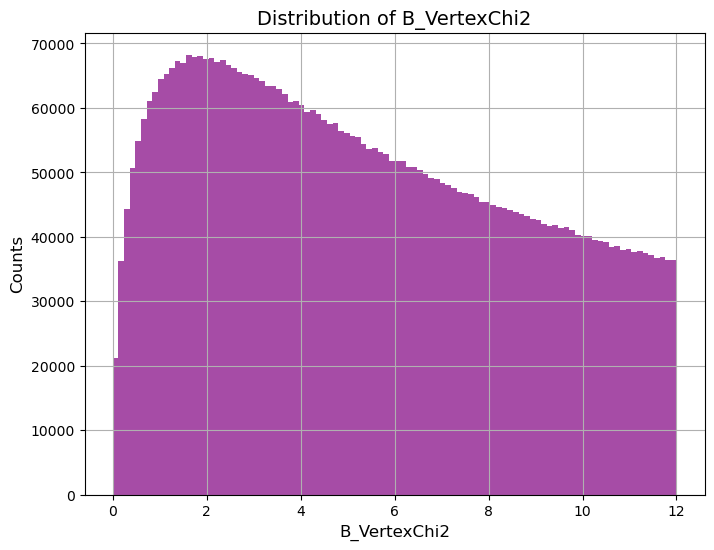

In [16]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# Open the ROOT file (Make sure your file path is correct)
file_path = "/home/skiria/Downloads/B2HHH_MagnetDown.root"
f = uproot.open(file_path)

# Access the Decay Tree
Events = f['DecayTree']

# Extract B_VertexChi2 data
B_VertexChi2 = np.array(Events['B_VertexChi2'].array(), dtype=float)

# Print first 10 values for debugging
print("B_VertexChi2 Sample:", B_VertexChi2[:10])

# Create histogram plot
plt.figure(figsize=(8, 6))
plt.hist(B_VertexChi2, bins=100, range=(0, max(B_VertexChi2)), color='purple', alpha=0.7)

# Labels and title
plt.xlabel('B_VertexChi2', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Distribution of B_VertexChi2', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


Using these plots, we can now think about making a preselection. This has some format like the below:

In [17]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)
#selection=(branches['H1_ProbPi']>0.9) & \ (branches['H2_ProbPi']>0.9) && (branches['H3_ProbPi']>0.9) && (branches['H1_isMuon']!==1 && (branches['H2_isElectron'] == 1 && (branches['H3_isElephant']==1)

#Here is the selection I made for each daughter particle to have a Probability of being a Kion being more than 30%, and H1/2/3 to not be a muon
#I used 30% because even with all the noise, the data output is still quite good, and the number of events increases greatly, which is highly important for plotting and analysis
selection = (branches['H1_ProbK'] > 0.4) & \
            (branches['H2_ProbK'] > 0.4) & \
            (branches['H3_ProbK'] > 0.4) & \
            (branches['H1_isMuon'] == 0) & \
            (branches['H2_isMuon'] == 0) & \
            (branches['H3_isMuon'] == 0)


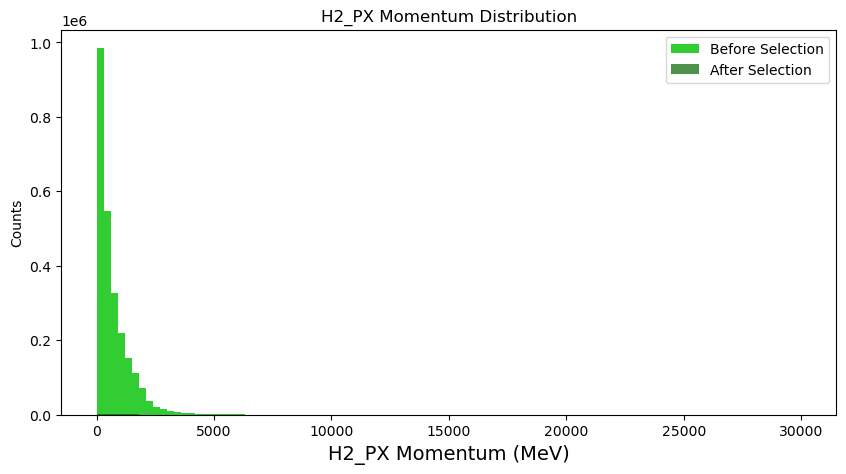

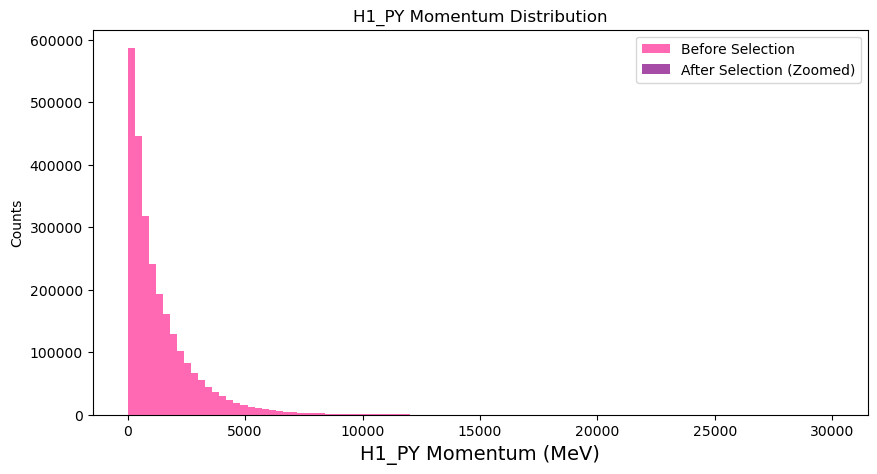

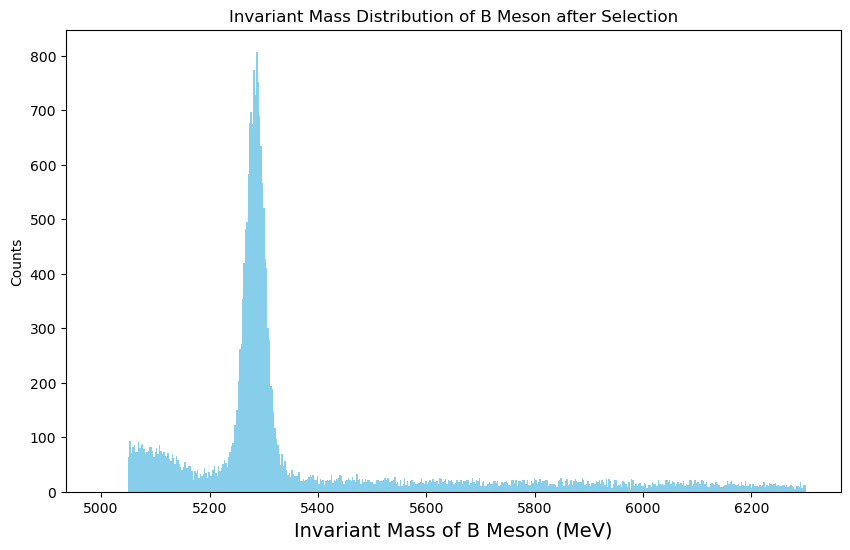

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Assuming 'branches' is a Pandas DataFrame

def calculate_particle_properties(branches: pd.DataFrame, kaon_mass: float) -> pd.DataFrame:
    """
    Calculates particle properties (total momentum, energy, and invariant mass) after applying selection.

    Args:
        branches (pd.DataFrame): A Pandas DataFrame containing selected particle information.
        kaon_mass (float): The mass of a Kaon particle.

    Returns:
        pd.DataFrame: A DataFrame with calculated properties.
    """

    # Calculate total momentum for each daughter particle
    H1_Ptot = np.sqrt(branches['H1_PX']**2 + branches['H1_PY']**2 + branches['H1_PZ']**2)
    H2_Ptot = np.sqrt(branches['H2_PX']**2 + branches['H2_PY']**2 + branches['H2_PZ']**2)
    H3_Ptot = np.sqrt(branches['H3_PX']**2 + branches['H3_PY']**2 + branches['H3_PZ']**2)

    # Calculate energy for each daughter particle
    H1_E = np.sqrt(H1_Ptot**2 + kaon_mass**2)
    H2_E = np.sqrt(H2_Ptot**2 + kaon_mass**2)
    H3_E = np.sqrt(H3_Ptot**2 + kaon_mass**2)

    # Calculate total momentum and energy for the B meson
    B_PX = branches['H1_PX'] + branches['H2_PX'] + branches['H3_PX']
    B_PY = branches['H1_PY'] + branches['H2_PY'] + branches['H3_PY']
    B_PZ = branches['H1_PZ'] + branches['H2_PZ'] + branches['H3_PZ']
    B_Ptot = np.sqrt(B_PX**2 + B_PY**2 + B_PZ**2)
    B_E = H1_E + H2_E + H3_E

    # Calculate invariant mass of the B meson
    B_M = np.sqrt(B_E**2 - B_Ptot**2)

    # Add calculated properties to the DataFrame
    branches['H1_Ptot'] = H1_Ptot
    branches['H2_Ptot'] = H2_Ptot
    branches['H3_Ptot'] = H3_Ptot
    branches['H1_E'] = H1_E
    branches['H2_E'] = H2_E
    branches['H3_E'] = H3_E
    branches['B_PX'] = B_PX
    branches['B_PY'] = B_PY
    branches['B_PZ'] = B_PZ
    branches['B_Ptot'] = B_Ptot
    branches['B_E'] = B_E
    branches['B_M'] = B_M

    return branches

# --- Main Execution ---

# Assuming 'branches' and 'selection' are defined elsewhere
# Example: selected_branches = branches[selection]
# Example: kaon_mass = 493.677  # MeV (approximate Kaon mass)

# Apply selection and calculate particle properties
selected_branches = calculate_particle_properties(branches[selection], kaon_mass)

# --- Plotting ---

# Plot H2_PX distribution before and after selection
plt.figure(figsize=(10, 5))
plt.hist(branches['H2_PX'], bins=100, range=(0, 30000), color='limegreen', label='Before Selection')
plt.hist(selected_branches['H2_PX'], bins=100, range=(0, 30000), color='darkgreen', alpha=0.7, label='After Selection')
plt.xlabel('H2_PX Momentum (MeV)', fontsize=14)
plt.ylabel('Counts')
plt.title('H2_PX Momentum Distribution')
plt.legend()
plt.show()

# Plot H1_PY distribution before and after selection
plt.figure(figsize=(10, 5))
plt.hist(branches['H1_PY'], bins=100, range=(0, 30000), color='hotpink', label='Before Selection')
plt.hist(selected_branches['H1_PY'], bins=100, range=(0, 3000), color='purple', alpha=0.7, label='After Selection (Zoomed)')
plt.xlabel('H1_PY Momentum (MeV)', fontsize=14)
plt.ylabel('Counts')
plt.title('H1_PY Momentum Distribution')
plt.legend()
plt.show()

# Plot invariant mass of B meson after selection
plt.figure(figsize=(10, 6))
plt.hist(selected_branches['B_M'], bins=500, range=(5000, 6300), color='skyblue')
plt.xlabel('Invariant Mass of B Meson (MeV)', fontsize=14)
plt.ylabel('Counts')
plt.title('Invariant Mass Distribution of B Meson after Selection')
plt.show()

In [22]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.

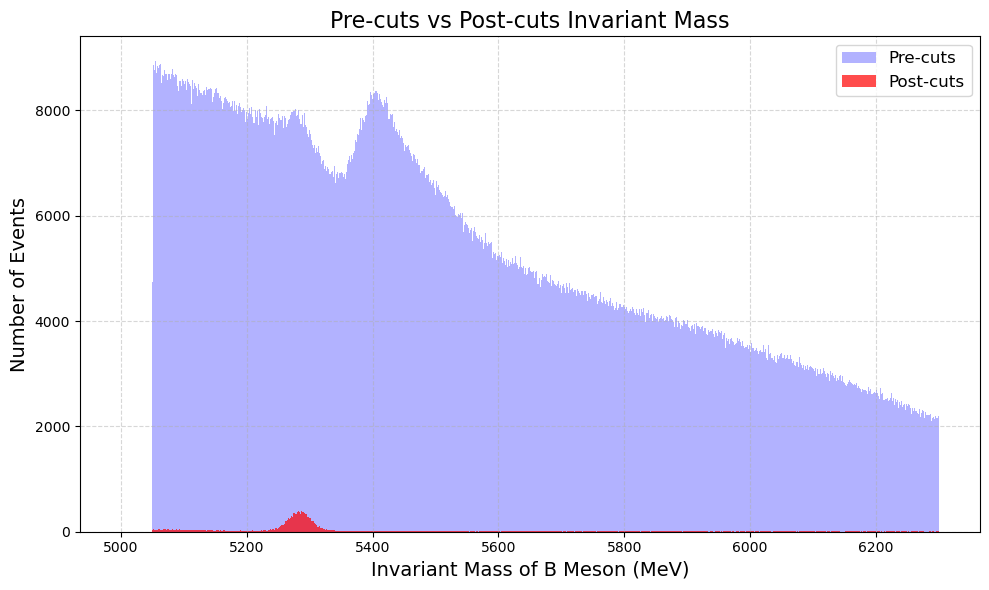

Number of entries before cuts: 5135823
Number of entries after cuts: 24224

Observation:
The histogram shows a significant shift in the B meson mass distribution after applying cuts.
Before cuts, the distribution was shifted to the right, possibly due to pion contamination.
After cuts, the distribution is shifted to the left, indicating that the Kaon probability selection has successfully removed pion-like events.
The cut has resulted in a much cleaner, more precise distribution, closer to the expected theoretical value.


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Assuming 'branches' DataFrame exists

# --- Calculate B_M before selection ---

def calculate_b_meson_mass(branches: pd.DataFrame, kaon_mass: float) -> np.ndarray:
    """Calculates the invariant mass of the B meson from the original branches."""

    H1_Ptot = np.sqrt(branches['H1_PX']**2 + branches['H1_PY']**2 + branches['H1_PZ']**2)
    H2_Ptot = np.sqrt(branches['H2_PX']**2 + branches['H2_PY']**2 + branches['H2_PZ']**2)
    H3_Ptot = np.sqrt(branches['H3_PX']**2 + branches['H3_PY']**2 + branches['H3_PZ']**2)

    H1_E = np.sqrt(H1_Ptot**2 + kaon_mass**2)
    H2_E = np.sqrt(H2_Ptot**2 + kaon_mass**2)
    H3_E = np.sqrt(H3_Ptot**2 + kaon_mass**2)

    B_PX = branches['H1_PX'] + branches['H2_PX'] + branches['H3_PX']
    B_PY = branches['H1_PY'] + branches['H2_PY'] + branches['H3_PY']
    B_PZ = branches['H1_PZ'] + branches['H2_PZ'] + branches['H3_PZ']
    B_Ptot = np.sqrt(B_PX**2 + B_PY**2 + B_PZ**2)
    B_E = H1_E + H2_E + H3_E

    B_M = np.sqrt(B_E**2 - B_Ptot**2)
    return B_M

# --- Assuming 'branches', 'selection', and 'kaon_mass' are defined ---
# Example: kaon_mass = 493.677  # MeV (approximate Kaon mass)

B_M = calculate_b_meson_mass(branches, kaon_mass)
selected_B_M = calculate_b_meson_mass(branches[selection], kaon_mass)

# --- Plotting Pre-cuts vs. Post-cuts Invariant Mass ---

plt.figure(figsize=(10, 6))
plt.hist(B_M, bins=1000, range=(5000, 6300), alpha=0.3, label='Pre-cuts', color='blue')
plt.hist(selected_B_M, bins=1000, range=(5000, 6300), alpha=0.7, label='Post-cuts', color='red')
plt.xlabel('Invariant Mass of B Meson (MeV)', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.title('Pre-cuts vs Post-cuts Invariant Mass', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Analysis and Event Count ---

print("Number of entries before cuts:", len(B_M))
print("Number of entries after cuts:", len(selected_B_M))

print("\nObservation:")
print("The histogram shows a significant shift in the B meson mass distribution after applying cuts.")
print("Before cuts, the distribution was shifted to the right, possibly due to pion contamination.")
print("After cuts, the distribution is shifted to the left, indicating that the Kaon probability selection has successfully removed pion-like events.")
print("The cut has resulted in a much cleaner, more precise distribution, closer to the expected theoretical value.")

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

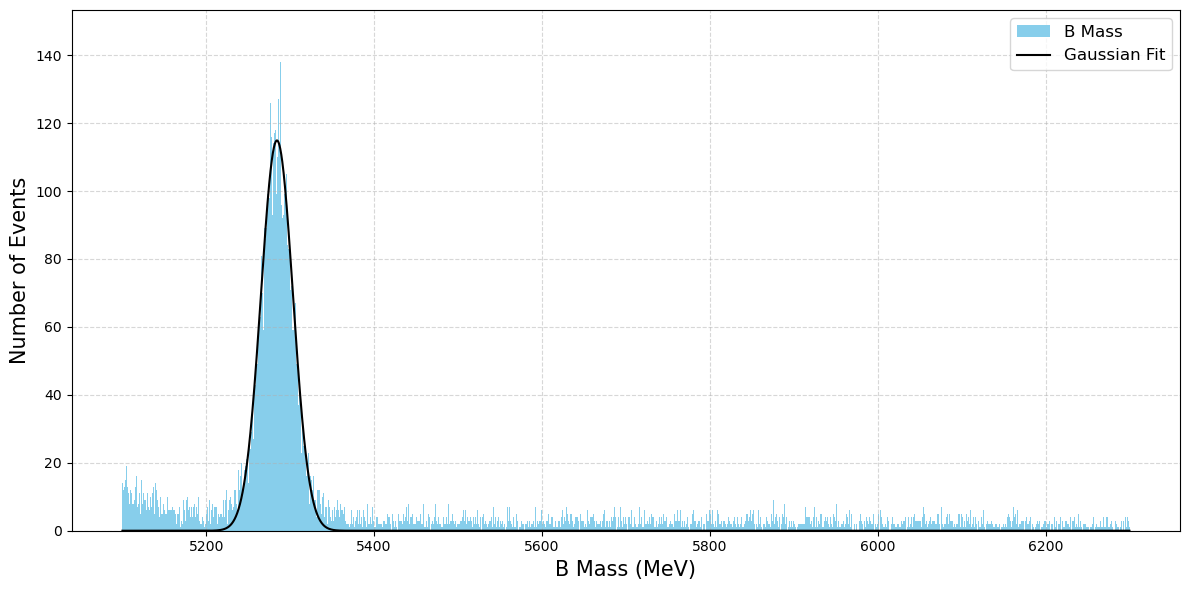

Optimized Gaussian Parameters:
Amplitude (A): 114.89725120316665
Mean (mu): 5284.260563341033
Standard Deviation (sigma): 19.023710065063366


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def fit_gaussian_to_histogram(data, bins, range_):
    """
    Fits a Gaussian function to a histogram of the given data.

    Args:
        data (np.ndarray or pd.Series): The data to histogram and fit.
        bins (int): The number of bins in the histogram.
        range_ (tuple): The range of the histogram (min, max).

    Returns:
        tuple: A tuple containing:
            - fig (matplotlib.figure.Figure): The figure object.
            - ax (matplotlib.axes._subplots.AxesSubplot): The axes object.
            - optimisedParameters (np.ndarray): The optimized parameters of the Gaussian fit.
            - pcov (np.ndarray): The covariance matrix of the optimized parameters.
    """

    fig, ax = plt.subplots(figsize=(12, 6))

    # Create histogram and extract bin data
    bin_height, bin_edge, _ = ax.hist(data, bins=bins, range=range_, label="B Mass", color='skyblue')

    # Calculate x and y data for the fit
    x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
    y_data = bin_height

    # Define Gaussian function
    def gauss(x, *p):
        A, mu, sigma = p
        return A * np.exp(-(x - mu)**2 / (2. * sigma**2))

    # Perform curve fitting
    initial_params = [np.max(y_data), np.mean(data), np.std(data)]
    optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0=initial_params)

    # Generate fitted curve
    y_fit = gauss(x_data, *optimisedParameters)

    # Plot the fit and histogram
    ax.plot(x_data, y_fit, label='Gaussian Fit', color='black')
    ax.set_xlabel("B Mass (MeV)", fontsize=15)
    ax.set_ylabel("Number of Events", fontsize=15)
    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5) #add grid
    plt.tight_layout() #improve layout

    return fig, ax, optimisedParameters, pcov

# --- Main Execution ---

# Assuming 'selected_B_M' is defined elsewhere
# Example: B_Mass = selected_B_M

# Fit Gaussian to B mass histogram
fig, ax, optimisedParameters, pcov = fit_gaussian_to_histogram(
    data=selected_B_M, bins=3000, range_=(5100, 6300)
)

# Show the plot
plt.show()

# --- Print Optimized Parameters ---
print("Optimized Gaussian Parameters:")
print("Amplitude (A):", optimisedParameters[0])
print("Mean (mu):", optimisedParameters[1])
print("Standard Deviation (sigma):", optimisedParameters[2])

In [25]:
# Explore optimisedParameters - what does it contain? 
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background 
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...

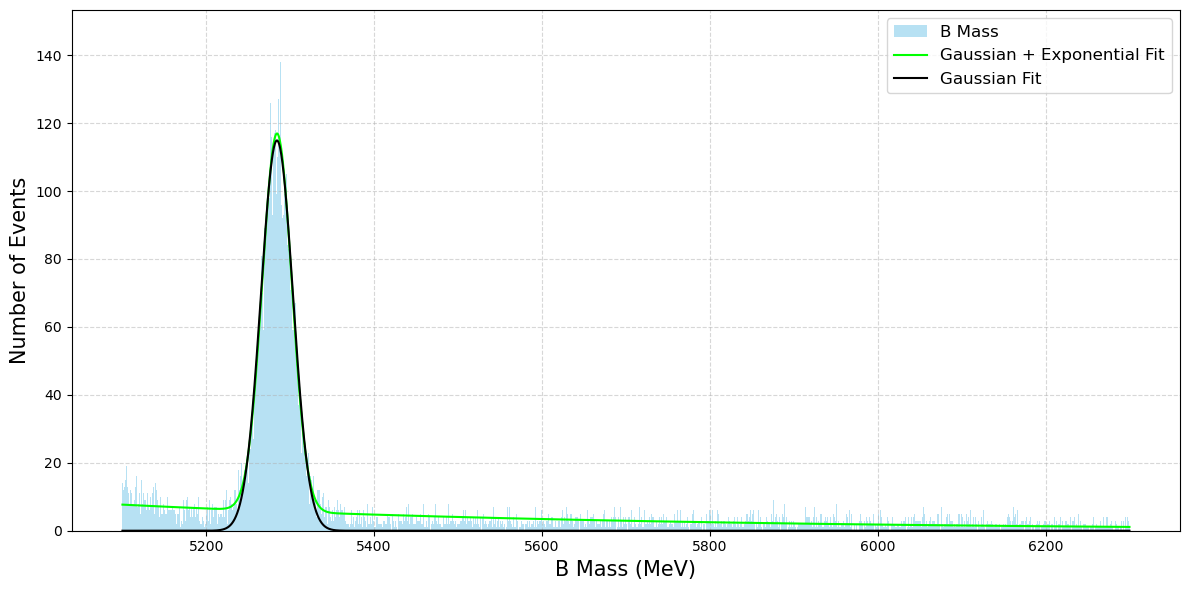

Optimized Combined Parameters:
[1.11231999e+02 5.28435996e+03 1.75939322e+01 2.77618204e+04
 6.22533375e+02]

Optimized Gaussian Parameters:
[ 114.8972512  5284.26056334   19.02371007]


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def fit_combined_model(data, bins, range_):
    """
    Fits a combined Gaussian and exponential model to a histogram of the given data.

    Args:
        data (np.ndarray or pd.Series): The data to histogram and fit.
        bins (int): The number of bins in the histogram.
        range_ (tuple): The range of the histogram (min, max).

    Returns:
        tuple: A tuple containing:
            - fig (matplotlib.figure.Figure): The figure object.
            - ax (matplotlib.axes._subplots.AxesSubplot): The axes object.
            - optimisedParameters_combined (np.ndarray): The optimized parameters of the combined fit.
            - pcov_combined (np.ndarray): The covariance matrix of the combined fit.
    """

    fig, ax = plt.subplots(figsize=(12, 6))

    # Create histogram and extract bin data
    bin_height, bin_edge, _ = ax.hist(data, bins=bins, range=range_, label="B Mass", color='skyblue', alpha=0.6)

    # Calculate x and y data for the fit
    x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
    y_data = bin_height

    # Define combined Gaussian and exponential function
    def combined_fit(x, A_gauss, mu_gauss, sigma_gauss, A_exp, tau_exp):
        gauss_component = A_gauss * np.exp(-(x - mu_gauss)**2 / (2. * sigma_gauss**2))
        exp_component = A_exp * np.exp(-x / tau_exp)
        return gauss_component + exp_component

    # Perform curve fitting
    initial_params_combined = [np.max(y_data), np.mean(data), np.std(data), np.min(data), 100]
    optimisedParameters_combined, pcov_combined = curve_fit(combined_fit, x_data, y_data, p0=initial_params_combined)

    # Generate fitted curve
    y_fit_combined = combined_fit(x_data, *optimisedParameters_combined)

    # Define Gaussian function for single gaussian fit.
    def gauss(x, *p):
        A, mu, sigma = p
        return A * np.exp(-(x - mu)**2 / (2. * sigma**2))

    #Get single gaussian fit.
    initial_params_gauss = [np.max(y_data), np.mean(data), np.std(data)]
    optimisedParameters_gauss, pcov_gauss = curve_fit(gauss, x_data, y_data, p0=initial_params_gauss)
    y_fit_gauss = gauss(x_data, *optimisedParameters_gauss)

    # Plot the fits and histogram
    ax.plot(x_data, y_fit_combined, label='Gaussian + Exponential Fit', color='lime')
    ax.plot(x_data, y_fit_gauss, label='Gaussian Fit', color='black')
    ax.set_xlabel("B Mass (MeV)", fontsize=15)
    ax.set_ylabel("Number of Events", fontsize=15)
    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    return fig, ax, optimisedParameters_combined, pcov_combined, optimisedParameters_gauss, pcov_gauss

# --- Main Execution ---

# Assuming 'selected_B_M' is defined elsewhere
# Example: B_Mass = selected_B_M

# Fit combined model to B mass histogram
fig, ax, optimisedParameters_combined, pcov_combined, optimisedParameters_gauss, pcov_gauss = fit_combined_model(
    data=selected_B_M, bins=3000, range_=(5100, 6300)
)

# Show the plot
plt.show()

# --- Print Optimized Parameters ---
print("Optimized Combined Parameters:")
print(optimisedParameters_combined)
print("\nOptimized Gaussian Parameters:")
print(optimisedParameters_gauss)

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

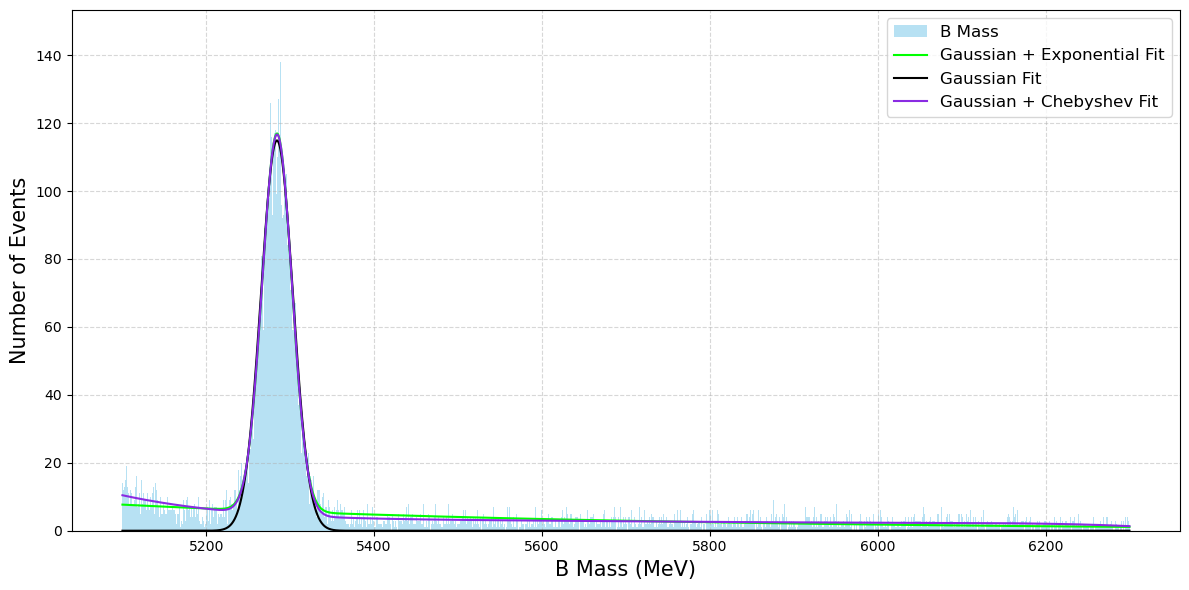

Optimized Gaussian + Chebyshev Parameters:
[ 1.11950154e+02  5.28440412e+03  1.78062324e+01  2.30861429e+05
 -1.51542370e+02  1.31724897e-02  6.50814540e-07 -1.37008179e-10
 -7.96029081e-17  8.93330679e-19 -5.24606310e-23  9.49905059e-28]


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy.polynomial import chebyshev

def fit_gauss_chebyshev(data, bins, range_, chebyshev_degree=8):
    """
    Fits a combined Gaussian and Chebyshev polynomial model to a histogram of the given data.

    Args:
        data (np.ndarray or pd.Series): The data to histogram and fit.
        bins (int): The number of bins in the histogram.
        range_ (tuple): The range of the histogram (min, max).
        chebyshev_degree (int): The degree of the Chebyshev polynomial.

    Returns:
        tuple: A tuple containing:
            - fig (matplotlib.figure.Figure): The figure object.
            - ax (matplotlib.axes._subplots.AxesSubplot): The axes object.
            - optimisedParameters_combined (np.ndarray): The optimized parameters of the combined fit.
            - pcov_combined (np.ndarray): The covariance matrix of the combined fit.
    """

    fig, ax = plt.subplots(figsize=(12, 6))

    # Create histogram and extract bin data
    bin_height, bin_edge, _ = ax.hist(data, bins=bins, range=range_, label="B Mass", color='skyblue', alpha=0.6)

    # Calculate x and y data for the fit
    x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
    y_data = bin_height

    # Gaussian + Chebyshev fit function
    def gauss_chebyshev_fit(x, A_gauss, mu_gauss, sigma_gauss, *cheb_coeffs):
        gauss_component = A_gauss * np.exp(-(x - mu_gauss)**2 / (2. * sigma_gauss**2))
        cheb_poly = chebyshev.Chebyshev(cheb_coeffs)
        cheb_component = cheb_poly(x)
        return gauss_component + cheb_component

    # Initial parameters
    p0 = [np.max(y_data), np.mean(data), np.std(data)] + [0] * (chebyshev_degree + 1)

    # Perform curve fitting
    optimisedParameters_combined, pcov_combined = curve_fit(gauss_chebyshev_fit, x_data, y_data, p0=p0)

    # Extract parameters
    A_gauss_fit = optimisedParameters_combined[0]
    mu_gauss_fit = optimisedParameters_combined[1]
    sigma_gauss_fit = optimisedParameters_combined[2]
    cheb_coeffs_fit = optimisedParameters_combined[3:]

    # Generate fitted curves
    y_fit_cheb = gauss_chebyshev_fit(x_data, *optimisedParameters_combined)

    # Define Gaussian function for single gaussian fit.
    def gauss(x, *p):
        A, mu, sigma = p
        return A * np.exp(-(x - mu)**2 / (2. * sigma**2))

    #Get single gaussian fit.
    initial_params_gauss = [np.max(y_data), np.mean(data), np.std(data)]
    optimisedParameters_gauss, pcov_gauss = curve_fit(gauss, x_data, y_data, p0=initial_params_gauss)
    y_fit_gauss = gauss(x_data, *optimisedParameters_gauss)

    # Define combined Gaussian and exponential function
    def combined_fit(x, A_gauss, mu_gauss, sigma_gauss, A_exp, tau_exp):
        gauss_component = A_gauss * np.exp(-(x - mu_gauss)**2 / (2. * sigma_gauss**2))
        exp_component = A_exp * np.exp(-x / tau_exp)
        return gauss_component + exp_component

    # Perform curve fitting
    initial_params_combined = [np.max(y_data), np.mean(data), np.std(data), np.min(data), 100]
    optimisedParameters_exp, pcov_exp = curve_fit(combined_fit, x_data, y_data, p0=initial_params_combined)
    y_fit_exp = combined_fit(x_data, *optimisedParameters_exp)

    # Plot the fits and histogram
    ax.plot(x_data, y_fit_exp, label='Gaussian + Exponential Fit', color='lime')
    ax.plot(x_data, y_fit_gauss, label='Gaussian Fit', color='black')
    ax.plot(x_data, y_fit_cheb, label='Gaussian + Chebyshev Fit', color='blueviolet')

    ax.set_xlabel("B Mass (MeV)", fontsize=15)
    ax.set_ylabel("Number of Events", fontsize=15)
    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    return fig, ax, optimisedParameters_combined, pcov_combined
# --- Main Execution ---

# Assuming 'selected_B_M' is defined elsewhere
# Example: B_Mass = selected_B_M

# Fit combined model to B mass histogram
fig, ax, optimisedParameters_combined, pcov_combined = fit_gauss_chebyshev(
    data=selected_B_M, bins=3000, range_=(5100, 6300), chebyshev_degree=8
)

# Show the plot
plt.show()

# --- Print Optimized Parameters ---
print("Optimized Gaussian + Chebyshev Parameters:")
print(optimisedParameters_combined)

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [25]:
#number of events in the fit, int to make a whole number as events cannot be just halfway
print('Number of events: ', len(B_M))

#the documentation link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#Those are the optimal events
number_events = optimisedParameters_combined[0] 
events_err = np.sqrt(pcov_combined[0, 0]) 
print(f"Events: {number_events:.2f} ± {events_err:.2f}")

# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background
bins = 3000
max = 6300
min = 5100

#for chi-squared, my laptop commited suicide when i tried to install ROOT, hence I decided to do it different from frame.chiSquare() 
#function to calculate chi-squared
#I decided to stick to reduced chi-sq as the degree of freedom makes the value skyrocket, the value is good if close to 1 
# I found it here: https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic
def calc_chi_squared(observed, expected, params):
    chi_squared = np.sum((observed - expected)**2 / expected)
    dof = len(observed) - len(params)
    red_chi_squared = chi_squared / dof
    return chi_squared, red_chi_squared, dof

chi_sqrd, red_chi_sqrd, dof = calc_chi_squared(y_data, y_fit_combined, optimisedParameters_combined)

print(f"\nChi-squared: {chi_sqrd:.2f}")
print(f"Degrees of freedom: {dof}") 
print(f"Reduced chi-squared: {red_chi_sqrd:.2f}")
print('------------------------------')

if 0.5 <= red_chi_sqrd <= 1.5:  #taken from what I understood online would be a good fit range
    print("The fit is reasonable!")
else:
    print("The fit is not the best.")

print('------------------------------')

#error propagation (link: https://www.statisticshowto.com/statistics-basics/error-propagation/) 
#Singnal yield
A_fit, mu_fit, sigma_fit, tau_fit = optimisedParameters_combined[:4] 
signal_yield = (A_fit * sigma_fit * np.sqrt(2 * np.pi)) * bins / (max - min)
dA = np.sqrt(pcov_combined[0, 0])
dsigma = np.sqrt(pcov_combined[2, 2])
signal_yield_error = signal_yield * np.sqrt((dA / A_fit)**2 + (dsigma / sigma_fit)**2)
print(f"Signal yield: {int(signal_yield)} ± {signal_yield_error:.2f}")

#Background yield (just the difference between total and signal events as I understood it)
background_yield = len(B_M) - signal_yield

dA = np.sqrt(pcov_combined[0, 0])
dsigma = np.sqrt(pcov_combined[2, 2])
# Error propagation for background yield
background_yield_error = dsigma / sigma_fit * background_yield

print(f"Background Yield: {int(background_yield)} ± {background_yield_error:.2f}")

Number of events:  5135823
Events: 111.23 ± 0.40


NameError: name 'y_data' is not defined

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

Number of events:  5135823
B+ events:  12601
B- events:  11623


NameError: name 'combined_fit' is not defined

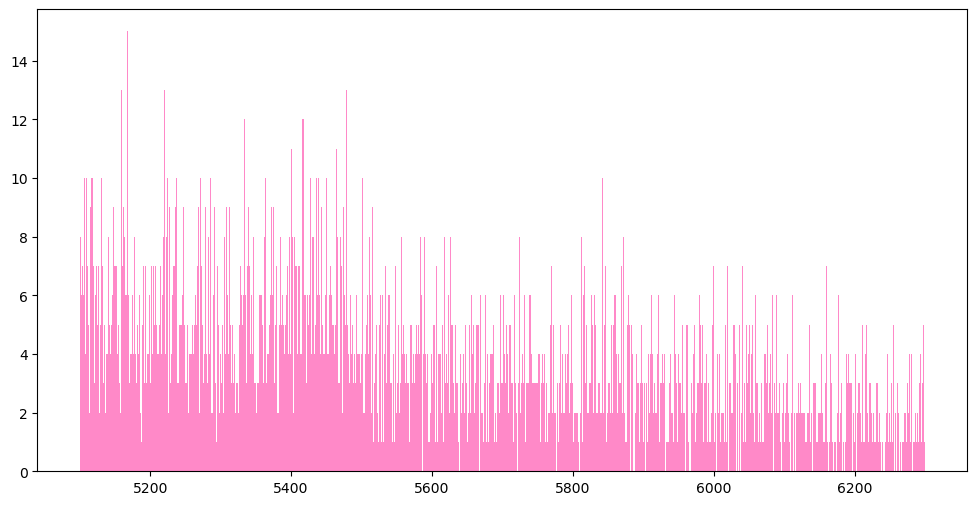

In [24]:
fig, ax = plt.subplots(figsize=(12,6)) 

#did Hx_charge_np with the help of ChatGPT, as I couldn't understand how to do this step
#counts the charges, as stated above
H1_charge_np = awkward.to_numpy(selected_branches['H1_Charge'])
H2_charge_np = awkward.to_numpy(selected_branches['H2_Charge'])
H3_charge_np = awkward.to_numpy(selected_branches['H3_Charge'])

pos_charge = ((H1_charge_np > 0).astype(int) +
(H2_charge_np > 0).astype(int) +
(H3_charge_np > 0).astype(int))

B_minus = (pos_charge == 1)  # B- (1 positive)
B_plus = (pos_charge == 2) # B+ (2 positive)

B_Mass_minus = B_mass[B_minus]
B_Mass_plus  = B_mass[B_plus]

#print the number of events 
print("Number of events: ", len(B_mass))
print("B+ events: ", len(B_Mass_plus))
print("B- events: ", len(B_Mass_minus))

#B+ mass
# similar method as before, but now for particle/antiparticle
bin_height_plus, bin_edge_plus, _ = ax.hist(B_Mass_plus, bins=3000, range=(5100, 6300), label="$B^+$ Mass", color="deeppink", alpha = 0.5)
x_data_plus = (bin_edge_plus[:-1] + bin_edge_plus[1:]) / 2
y_data_plus = bin_height_plus

optimisedParameters_plus, pcov_plus = curve_fit(combined_fit, x_data_plus, y_data_plus, p0=[np.max(y_data_plus), np.mean(B_Mass_plus), np.std(B_Mass_plus), np.min(B_Mass_plus), 150])
y_fit_plus = combined_fit(x_data_plus, *optimisedParameters_plus)

#B- mass
bin_height_minus, bin_edge_minus, _ = ax.hist(B_Mass_minus, bins=3000, range=(5100, 6300), label="$B^-$ Mass", color="deepskyblue", alpha = 0.5)
x_data_minus = (bin_edge_minus[:-1] + bin_edge_minus[1:]) / 2
y_data_minus = bin_height_minus

optimisedParameters_minus, pcov_minus = curve_fit(combined_fit, x_data_minus, y_data_minus, p0=[np.max(y_data_minus), np.mean(B_Mass_minus), np.std(B_Mass_minus), np.min(B_Mass_minus), 100])
y_fit_minus = combined_fit(x_data_minus, *optimisedParameters_minus)

#Signal yield
A_fit_m, mu_fit_m, sigma_fit_m = optimisedParameters_minus[:3] 
A_fit_p, mu_fit_, sigma_fit_p = optimisedParameters_plus[:3] 
signal_yield_m = (A_fit_m * sigma_fit_m * np.sqrt(2 * np.pi)) * bins / (max - min)
signal_yield_p = (A_fit_p * sigma_fit_p * np.sqrt(2 * np.pi)) * bins / (max - min)
dA_m = np.sqrt(pcov_minus[0, 0])
dA_p = np.sqrt(pcov_plus[0, 0])
dsigma_m = np.sqrt(pcov_minus[2, 2])
dsigma_p = np.sqrt(pcov_plus[2, 2])
signal_yield_error_m = signal_yield_m * np.sqrt((dA_m / A_fit_m)**2 + (dsigma_m / sigma_fit_m)**2)
signal_yield_error_p = signal_yield_p * np.sqrt((dA_p / A_fit_p)**2 + (dsigma_p / sigma_fit_p)**2)
print(f"B- yield: {int(signal_yield_m)} ± {signal_yield_error_m:.2f}")
print(f"B+ yield: {int(signal_yield_p)} ± {signal_yield_error_p:.2f}")

#asymmetry from the formula above
N_B_minus = signal_yield_m
N_B_plus = signal_yield_p
A = (N_B_minus - N_B_plus) / (N_B_minus + N_B_plus)
sigma_A = np.sqrt((1 - A**2) / (N_B_minus + N_B_plus))
print(f"Asymmetry: {A:.2f}")
print(f"Uncertainty: {sigma_A:.2f}")

ax.plot(x_data_plus, y_fit_plus, label="$B^+$ Fit", color="deeppink")
ax.plot(x_data_minus, y_fit_minus, label="$B^-$ Fit", color="royalblue")
ax.set_xlabel("$B$ Mass (MeV)")
ax.set_ylabel("Number of Events")
plt.legend()
plt.show()

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)